# IMPORT LIBRARY

Tahap awal sebelum kita membangun sebuah model machine learning adalah mendefinisikan problem statement yang ingin kita selesaikan. Pada tahap ini kita menentukan apa masalah yang ingin diselesaikan dan bagaimana implementasi dari model jaringan saraf tiruan dapat menyelesaikan masalah tersebut. Setelah kita memahami masalah, kita dapat mengembangkan model jaringan saraf tiruan sebagai sebuah solusi.Pada latihan kali ini kita akan membuat sebuah model untuk mengklasifikasi gambar sebuah kamar dan memprediksi apakah kamar tersebut rapi atau berantakan. Pada akhir latihan Anda dapat menguji model yang telah dibuat dengan menggunakan gambar kamar Anda sendiri. Keren, bukan?

In [1]:
#Cek Versi Tenserflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-12-15 02:00:52--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 104.18.13.192, 104.18.12.192, 2606:4700::6812:dc0, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|104.18.13.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   162MB/s    in 0.4s    

2023-12-15 02:00:52 (162 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')


In [4]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [5]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.


In [8]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

Found 20 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [11]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
# latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 17s - loss: 0.7690 - accuracy: 0.5600 - val_loss: 0.6676 - val_accuracy: 0.5000 - 17s/epoch - 697ms/step
Epoch 2/20
25/25 - 16s - loss: 0.7072 - accuracy: 0.5600 - val_loss: 0.6897 - val_accuracy: 0.5000 - 16s/epoch - 624ms/step
Epoch 3/20
25/25 - 16s - loss: 0.6962 - accuracy: 0.5100 - val_loss: 0.6929 - val_accuracy: 0.5000 - 16s/epoch - 633ms/step
Epoch 4/20
25/25 - 15s - loss: 0.6930 - accuracy: 0.4600 - val_loss: 0.6821 - val_accuracy: 0.5000 - 15s/epoch - 593ms/step
Epoch 5/20
25/25 - 16s - loss: 0.6747 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5000 - 16s/epoch - 631ms/step
Epoch 6/20
25/25 - 15s - loss: 0.6963 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - 15s/epoch - 619ms/step
Epoch 7/20
25/25 - 19s - loss: 0.6961 - accuracy: 0.5300 - val_loss: 0.6690 - val_accuracy: 0.5000 - 19s/epoch - 772ms/step
Epoch 8/20
25/25 - 23s - loss: 0.6593 - accuracy: 0.5500 - val_loss: 0.6896 - val_accuracy: 0.5000 - 23s/epoch - 935ms/step
Epoch 9/

Saving 0_QOBZ_ESeUUOaUcLg.jpg to 0_QOBZ_ESeUUOaUcLg.jpg
1/1 [==============================] - 0s 180ms/step
0_QOBZ_ESeUUOaUcLg.jpg
clean


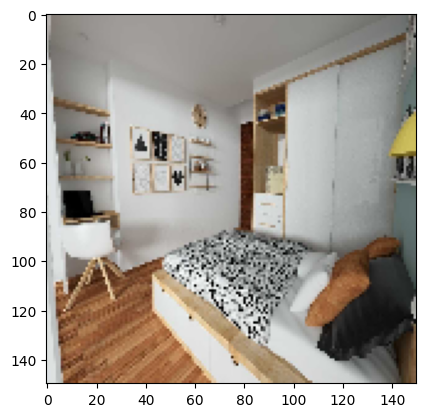

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')